# NLP Course-Quora Binary Classification


This is a binary classification (traditional)/semantic classification approach by applying different techniques -EDA(feature engineering,gram analysis),embeddings,deep neural networks,transformer architectures and evaluation.


## Important Points

1. EDA- Data Analysis, Statistical Analysis, Tensor Decomposition Strategies, non semantic inference, gram analysis
2. Embeddings- Static Embeddings - word2vec, glove, wikitext,keras Embeddings
3. Preliminary Deep Models- using Keras, TF, important aspects on LSTM,Convolution Networks.
4. Extensive Embedding Architectures- Transformers - Variants of Bert, GPT
5. Evaluation- Checking accuracy and predictions

## Salient resources

Resources for each part will be shared along with very important kernels and other notebooks which are relevant pertaining to this course.



# EDA- Analysis and Benchmarking


The theme of the kernel is to abstract and segregate potentially insincere Quora questions. This module will be used as a starting point for initial analysis of semantics,grams. For an extended implication and requirements of the kernel,please refer to : [Quora Insincere Question Classification](https://www.kaggle.com/c/quora-insincere-questions-classification/overview). 

In this module we will be looking into the following aspects:

1. The training and test data 
2. Simplified Statistics and Analysis-vectorization, gram analysis
3. Classic Reduction Techniques- PCA,SVD, TSNE
4. Creating a benchmark with classic statistical models

## Evaluation of the Dataset

This submodule will assist us in understanding the data as well as have an inital idea of the same.
Some resources for this include:

1. [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html),[TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html),[SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)
2. [tfidfvectorization](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html),[CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
3. [WordCloud](https://pypi.org/project/wordcloud/)
4. [Gram-Analysis](https://www.nltk.org/)
5. [Eda-notebook](https://www.kaggle.com/abhilash1910/tweet-analysis-eda-cleaning-tsne-glove-tf)


PCA works by eigenvector decomposition strategy as shown in the sample:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_ica_vs_pca_thumb.png"></img>




In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#see the input

!ls ../input
!ls ../input/quora-insincere-questions-classification

In [ ]:
#import libraries useful for the entire module
import pandas as pd 
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
from tqdm import tqdm
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [ ]:
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import collections
import keras as k
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
import xgboost
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit


In [ ]:
train_df=pd.read_csv('../input/quora-insincere-questions-classification/train.csv')
test_df=pd.read_csv('../input/quora-insincere-questions-classification/test.csv')
print(train_df.head())
print(test_df.head())
print("===========")
print("Training Shape".format(),train_df.shape)
print("Testing Shape".format(),test_df.shape)

In [ ]:
print("The type of columns in the dataset")
print("Columns".format(),train_df.columns)

In [ ]:

#Insincere question test
train_ext=train_df[train_df['target']==1]['question_text']
print(train_ext)



## Analysis 1- Word statistics

This analysis would be done on both the training and testing datasets.
A fundamental part of any NLP pipeline before applying transformations

In [ ]:
#Training data statistics

#Estimate the value counts
count_types=train_df['target'].value_counts()
print("Extracting counts".format(),count_types)
#Count targets with value 1

count_ones=train_df[train_df['target']==1].shape[0]
print(count_ones)
count_zeros=train_df[train_df['target']==0].shape[0]
print(count_zeros)

#Matplot to plot the amount of questions from either types
def plot_counts(count_ones,count_zeros):
    plt.rcParams['figure.figsize']=(6,6)
    plt.bar(0,count_ones,width=0.6,label='InSincere Questions',color='Red')
    plt.legend()
    plt.bar(2,count_zeros,width=0.6,label='Sincere Questions',color='Green')
    plt.legend()
    plt.ylabel('Count of Questions (in M)')
    plt.xlabel('Types of Questions')
    plt.show()

    
#Seaborn Dist plot for analysing the length of a question sentence    
def plot_wordcount(count_ones_length,count_zeros_length):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros_length,ax=ax1,color='Blue')
    ax1.set_title('Sincere Question Length')
    sns.distplot(count_ones_length,ax=ax2,color='Red')
    ax2.set_title('Insincere Question Length')
    fig.suptitle('Average Length of Words in Question')
    plt.show()    

#Generic Plotter
def plot_count(count_punct_ones,count_punct_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_punct_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_punct_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()    


#preliminary word cloud statistics
def display_cloud(data):
    stopwords=set(STOPWORDS)
    wordcloud=WordCloud(stopwords=stopwords,max_font_size=120,max_words=300,width=800,height=400,background_color='white',min_font_size=5).generate(str(data))
    plt.figure(figsize=(24,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Word Cloud of the questions")
    plt.show()


    
    
#Extract the length of the insincere-sincere questions
def word_length(x):
    return len(x)


count_ones_length=train_df[train_df['target']==1]['question_text'].str.split().apply(lambda z:word_length(z))
print("Length of each insincere questions".format(),count_ones_length[:5])
count_zeros_length=train_df[train_df['target']==0]['question_text'].str.split().apply(lambda z: word_length(z))
print("Length of each sincere questions".format(),count_zeros_length[:5])

#Plots
plot_counts(count_ones,count_zeros)
plot_wordcount(count_ones_length,count_zeros_length)
display_cloud(train_df['question_text'])
display_cloud(train_df[train_df['target']==1]['question_text'])
display_cloud(train_df[train_df['target']==0]['question_text'])
#Other analysis
stops=set(stopwords.words('english'))
count_punct_ones=train_df[train_df['target']==1]['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
count_punct_zeros=train_df[train_df['target']==0]['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
title_1='Sincere Question Punctuations'
title_2='Insincere Question Punctuations'
subtitle='Punctuations in Questions'
plot_count(count_punct_ones,count_punct_zeros,title_1,title_2,subtitle)

count_avg_ones=train_df[train_df['target']==1]['question_text'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
count_avg_zeros=train_df[train_df['target']==0]['question_text'].apply(lambda z: np.mean([len(z) for w in str(z).split()]))
title_1='Insincere Question Average Length'
title_2='Sincere Question Average Length'
subtitle='Average Length'
plot_count(count_avg_ones,count_avg_zeros,title_1,title_2,subtitle)

In [ ]:
#Test dataset Word Statistics

def plot_testcount(count_test,title1,subtitle):
    fig,(ax1)=plt.subplots(1,figsize=(15,5))
    sns.distplot(count_test,ax=ax1,color='Orange')
    ax1.set_title(title_1)
    fig.suptitle(subtitle)
    plt.show()    

count_test=test_df['question_text'].str.split().apply(lambda z:word_length(z))
print("Length of each test questions".format(),count_test[:5])

#Plots
plot_testcount(count_test,'Questions in test','Total Questions')
display_cloud(test_df['question_text'])
#Other analysis
stops=set(stopwords.words('english'))
count_puncttest=test_df['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
title_1='Test Question Punctuations'
subtitle='Punctuations in Questions'
plot_testcount(count_puncttest,title_1,subtitle)

count_avg_test=test_df['question_text'].apply(lambda z : np.mean([len(z) for w in str(z).split()]))
title_1='Test Question Average Length'
subtitle='Average Length'
plot_testcount(count_avg_test,title_1,subtitle)

## Analysis 2- Gram Statistics

This will be useful for analysing the gram (bi,tri) in the words in the questions. It is an important step before cleaning.
Resources:

1. [Seaborn](https://seaborn.pydata.org/index.html)
2. [Gram Analysis](https://albertauyeung.github.io/2018/06/03/generating-ngrams.html)

A pictorial representation of gram analysis is provided here:

<img src="https://miro.medium.com/max/536/1*vZhxrBkCz-yN_rzZBqSKiA.png"></img>

In [ ]:
#Gram analysis on Training set
stopword=set(stopwords.words('english'))
def gram_analysis(data,gram):
    tokens=[t for t in data.lower().split(" ") if t!="" if t not in stopword]
    ngrams=zip(*[tokens[i:] for i in range(gram)])
    final_tokens=[" ".join(z) for z in ngrams]
    return final_tokens

#analyse most common Sentences
def mostcommon_words(data):
    counter=Counter(data)
    commonwords=counter.most_common()
    x_coord,y_coord=[],[]
    for words,occ in commonwords[:20]:
        if words not in stopword:
            x_coord.append(occ)
            y_coord.append(words)
            
    sns.barplot(x=x_coord,y=y_coord,saturation=1,orient="h")

#Create frequency grams for analysis
    
def create_dict(data,grams):
    freq_dict=defaultdict(int)
    for sentence in data:
        for tokens in gram_analysis(sentence,grams):
            freq_dict[tokens]+=1
    return freq_dict

def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["n_gram_words"].values[::-1],
        x=df["n_gram_frequency"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace



def create_new_df(freq_dict,):
    freq_df=pd.DataFrame(sorted(freq_dict.items(),key=lambda z:z[1])[::-1])
    freq_df.columns=['n_gram_words','n_gram_frequency']
    #print(freq_df.head())
    #plt.barh(freq_df['n_gram_words'][:20],freq_df['n_gram_frequency'][:20],linewidth=0.3)
    #plt.show()
    trace=horizontal_bar_chart(freq_df[:20],'blue')
    return trace
    
def plot_grams(trace_zero,trace_one):
    fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of sincere questions", 
                                          "Frequent words of insincere questions"])
    fig.append_trace(trace_zero, 1, 1)
    fig.append_trace(trace_ones, 1, 2)
    fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
    py.iplot(fig, filename='word-plots')
    
    
train_df_zero=train_df[train_df['target']==0]['question_text']
train_df_ones=train_df[train_df['target']==1]['question_text']

#mostcommon_words(train_df_zero)
print("Bi-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],2)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],2)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)



In [ ]:
print("Tri-gram analysis")
freq_train_df_zero=create_dict(train_df_zero[:200],3)
#print(freq_train_df_zero)
trace_zero=create_new_df(freq_train_df_zero)
freq_train_df_ones=create_dict(train_df_ones[:200],3)
#print(freq_train_df_zero)
trace_ones=create_new_df(freq_train_df_ones)
plot_grams(trace_zero,trace_ones)


In [ ]:
#Sentence Analysis
mostcommon_words(train_df_zero)

In [ ]:
#Sentence Analysis
mostcommon_words(train_df_ones)

In [ ]:
#Similar gram analysis using nltk after regexing

import re
from nltk.util import ngrams
def gram_analyse(s):
    
    s = s.lower()
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    tokens = [token for token in s.split(" ") if token != ""]
    output = list(ngrams(tokens, 5))
    return output

for j in range(0,10):

    out=gram_analyse(train_df_ones.iloc[j])
    print("Output grams",out)



# Inference From Initial Word Analysis

From the analysis, we see Sincere questions are in a larger quantity as compared to the Insincere questions. This may lead us to think the dataset is imbalanced. The gram statistics shows that there is a good correlation in trigram analysis of Insincere questions as compared to the Sincere ones. The number of words in insincere questions is larger as compared to the sincere ones, and the same can be deduced from the average sentence length of them as well.

For balancing certain strategies are important such as synthetic oversampling

1. [SMOTE](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html)
2. [ADASYN](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html)



There are other undersampling and oversampling methods as well:

1. [UnderSampling](https://imbalanced-learn.readthedocs.io/en/stable/under_sampling.html)
2. [OverSampling](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html)

This cannot be directly applied to textual data as it can be applied to vectorized(float) data.


SMOTE for imbalanced data can be previewed as follows (with orange samples being the synthetically generated class):

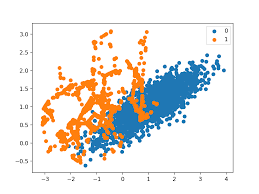</img>

Synthetic Data points generated by density functions in Adasyn is represented below:

<img src="https://glemaitre.github.io/imbalanced-learn/_images/sphx_glr_plot_adasyn_001.png"></img>


## Theoretical Diagram of SMOTE/ADASYN operation

Smote and Adasyn employ distance metrics of KNN/Kmeans for generating synthetic points. The difference lies in how the points are generated- Smote employs weighted distance metrics whereas Adasyn performs probabilistic density distributions for generating new points.

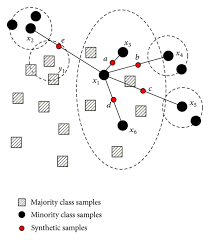</img>

## Some cleaning

This is mainly used for removing certain punctuations, stopwords from the corpus. Though the data is quite clean, we will clean this further with regex. 

1. [Regex](https://docs.python.org/3/library/re.html)

We can also stem the corpus but that will not be helpful in the long run, though lemmatizing may  be helpful to a certain extent.

1. [Stem](https://www.nltk.org/howto/stem.html)
2. [Lemmatize](http://www.nltk.org/api/nltk.stem.html?highlight=lemmatizer)


In [ ]:
#Regex cleaning

def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data
def clean_data(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data


train_df['question_text']=train_df['question_text'].apply(lambda z : remove_url(z))
train_df['question_text']=train_df['question_text'].apply(lambda z: clean_data(z))
train_df['question_text']=train_df['question_text'].apply(lambda z: remove_html(z))
train_df['question_text']=train_df['question_text'].apply(lambda z: remove_punctuations(z))

print("Cleaned Train Insincere Question Set")
print(train_df[train_df['target']==1]['question_text'].head())
print("Cleaned Train Sincere Question Set")
print(train_df[train_df['target']==0]['question_text'].head())


In [ ]:
#Lemmatizing the corpus as a backup

from nltk.stem import WordNetLemmatizer


def lemma_traincorpus(data):
    lemmatizer=WordNetLemmatizer()
    out_data=""
    for words in data:
        out_data+= lemmatizer.lemmatize(words)
    return out_data

train_df['question_text']=train_df['question_text'].apply(lambda z: lemma_traincorpus(z))
print(train_df.head())

# Vectorization and Benchmarking

In this contextt, we will look into vectorizing the training set with tfidf vectorizer and count vectorizer. Post that we will be fitting a statistical model from the sklearn library to get an initial benchmark . This is a very important step as an initial statistical benchmark should always be done before going in to deep models and advanced architectures.

In this section we will be vectorizing the train corpus first and then we will be using the following models:

1. [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
3. [SupportVectorMachines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
4. [LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)
5. [DecisionTrees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
6. [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
7. [XGBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
8. [LightGBM](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html) 


In [ ]:
#tfidf vectorization

tfidf_vect=TfidfVectorizer(stop_words='english',ngram_range=(1,3))
#tfidf_vect.fit_transform(train_df['question_text'].values.tolist() + test_df['question_text'].values.tolist())
train_tfidf=tfidf_vect.fit_transform(train_df['question_text'].values.tolist())
test_tfidf=tfidf_vect.fit_transform(test_df['question_text'].values.tolist())
print(train_tfidf)

#count vectorization
def count_vectorize(train_data,test_data):
    count_vectorize=CountVectorizer(stop_words='english',ngram_range=(1,3),analyzer='word',token_pattern='r\w{1,}')
    count_vectorize.fit_transform(train_data['question_text'].values.tolist() + test_data['question_text'].values.tolist())
    train_count=count_vectorize.transform(train_data['question_text'].values.tolist())
    test_count=count_vectorize.transform(test_data['question_text'].values.tolist())
    return train_count,test_count



## Creating Statistical Models 

In this section, we will be analysing the outcomes of different models mentioned above using k fold statistics from sklearn.

1. [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
2. [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)
3. [Kernel Using KFold](https://www.kaggle.com/abhilash1910/credit-card-fraud)

In [ ]:
train_y=train_df['target']

train_x=train_df['question_text']
print(train_y)
print(train_x)

In [ ]:
#Some preliminary models for sequential evaluation on the training set

#train_y=train_df['target'].values

# models=[]
# models.append(('LR',LogisticRegression()))
# models.append(('KNN',KNeighborsClassifier()))
# models.append(('LDA',LinearDiscriminantAnalysis()))
# models.append(('DT',DecisionTreeClassifier()))
# #models.append(('SVC',SVC()))
# model_result=[]
# scoring='accuracy'
# for name,model in models:
#     kfold=KFold(n_splits=10,random_state=7)
#     results=cross_val_score(model,train_tfidf,train_y,cv=kfold,scoring=scoring)
#     print("Classifiers: ",name, "Has a training score of", round(results.mean(), 2) * 100, "% accuracy score")
#     model_result.append(results.mean())

## Partitioning the Set

Since there is no validation set to benchmark against , we create an internal partition of training and testing sets from the tfidf transformed data.

1.[TrainTestSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
#split the training set into train and test evaluation sets
print(train_tfidf.shape)

train_x,test_x,train_y,test_y=train_test_split(train_tfidf,train_y,test_size=0.2,random_state=42)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

In [ ]:
# models=[]
# #models.append(('LR',LogisticRegression()))
# models.append(('KNN',KNeighborsClassifier()))
# models.append(('LDA',LinearDiscriminantAnalysis()))
# models.append(('DT',DecisionTreeClassifier()))

# #Now trying out different stats models
# def model_training(model,train_x,test_x,train_y,test_y):
#     model.fit(train_x,train_y)
#     pred=model.predict(test_x)
#     print("Evaluate confusion matrix")
#     print(confusion_matrix(test_y,pred))
#     print(accuracy_score(test_y,pred))
#     return accuracy_score(test_y,pred)
    
# for name,mods in models:
#     accuracy_score=model_training(mods,train_x,test_x,train_y,test_y)
#     print(accuracy_score)
    


## Logistic Regression

The logistic regression relies on Sigmoid function for classifications:

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--xoKf0Xfi--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://cdn-images-1.medium.com/max/2000/1%2AXisqJi764DTxragiRFexSQ.png"></img>

In [ ]:
#Logistic Regression
model=LogisticRegression()
model.fit(train_x,train_y)
pred=model.predict(test_x)
print("Evaluate confusion matrix")
print(confusion_matrix(test_y,pred))
print(accuracy_score(test_y,pred))
    

In [ ]:
#Naive Bayes

model=MultinomialNB()
model.fit(train_x,train_y)
pred=model.predict(test_x)
print("Evaluate confusion matrix")
print(confusion_matrix(test_y,pred))
print(accuracy_score(test_y,pred))
    

## LDA OverView:

A Generic LDA, can be viewed as follows:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_lda_qda_0011.png"></img>

In [ ]:
#LDA- Linear Disciminant Analysis

model=LinearDiscriminantAnalysis()
x_train=train_x.toarray()
model.fit(x_train,train_y)
pred=model.predict(test_x)
print("Evaluate confusion matrix")
print(confusion_matrix(test_y,pred))
print(accuracy_score(test_y,pred))
    

## Idea on Boosted Trees Architecture

This [link](https://xgboost.readthedocs.io/en/latest/tutorials/model.html) provides a good material for boosted trees , which can be shown below as :

<img src="https://raw.githubusercontent.com/dmlc/web-data/master/xgboost/model/struct_score.png"></img>

In [ ]:
#XGBoost
from xgboost import XGBClassifier as xg
model_xgb= xg(n_estimators=100,random_state=42)
model_xgb.fit(train_x,train_y)
y_pred_xgb=model_xgb.predict(test_x)
print("Confusion matrix")


## Boosting Architecture Summary

This provides a proper outline of a generic boosting model:

<img src="https://miro.medium.com/max/1554/1*FLshv-wVDfu-i54OqvZdHg.png"></img>

In [ ]:
print(confusion_matrix(test_y,y_pred_xgb))
print(accuracy_score(test_y,y_pred_xgb.round()))

In [ ]:
#LightGBM
from lightgbm import LGBMClassifier as lg
model_lgbm= lg(n_estimators=100,random_state=42)
model_lgbm.fit(train_x,train_y)
y_pred_lgbm=model_lgbm.predict(test_x)
print("Confusion matrix")
print(confusion_matrix(test_y,y_pred_lgbm))
print(accuracy_score(test_y,y_pred_lgbm.round()))

In [ ]:
#Decision Trees
model_dt=DecisionTreeClassifier(random_state=42)
model_dt.fit(train_x,train_y)
y_pred=model_dt.predict(test_x)
print("Confusion matrix")
print(confusion_matrix(test_y,y_pred))
print(accuracy_score(test_y,y_pred.round()))


## Random Forest Architecture

A random forest architecture with majority voting mechanism appears as follows:

<img src="https://www.researchgate.net/profile/Hung_Cao12/publication/333438248/figure/fig6/AS:763710377299970@1559094151459/Random-Forest-model-with-majority-voting.ppm"></img>

In [ ]:
#Random Forest
model_dt=RandomForestClassifier(random_state=42)
model_dt.fit(train_x,train_y)
y_pred=model_dt.predict(test_x)
print("Confusion matrix")
print(confusion_matrix(test_y,y_pred))
print(accuracy_score(test_y,y_pred.round()))


## Some facts on SVM

SVM uses a kernel(basis) for marginalizing the classes and hence it can take up a lot of time based on certain kernels. An overview of certain terms in SVM classification can be viewed as follows:

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png"></img>

### SVM takes a lot of time to train and evaluate

Since SVM takes time for vectorized datasets, we will be seeing it after the reduction/decomposition techniques- PCA/TSNE/SVD.

## Inference From Statistical Models

We see that statistical models provide a good benchmark  in terms of performance. Hyperparamater tuning using gridsearch,random search can also help to increase the performance. 

1. [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
2. [RandomizedSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

There are other models which are important in this context, namely SVM.SVM generally takes a lot of time to train and hence dimensionality reduction is very important before using SVM for statistical modelling. 


## Dimensionality Reduction Techniques

In this context , we will get into PCA, SVD and TSNE transformation of the input vectors to generate finite central points . These techniques involve statistical tensor/matrix decomposition algorithms which try to preserve the features based on the importance of the eigen vectors of the matrix.

In [ ]:
def dimen_reduc_plot(test_data,test_label,option):
    tsvd= TruncatedSVD(n_components=2,algorithm="randomized",random_state=42)
    tsne=TSNE(n_components=2,random_state=42) #not recommended instead use PCA
    pca=SparsePCA(n_components=2,random_state=42)
    if(option==1):
        tsvd_result=tsvd.fit_transform(test_data)
        plt.figure(figsize=(10,8))
        colors=['orange','red']
        
        sns.scatterplot(x=tsvd_result[:,0],y=tsvd_result[:,1],hue=test_label        )
        
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(tsvd_result[:,0],tsvd_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='red',label='False_Tweet')
        color_orange=mpatches.Patch(color='orange',label='Real_Tweet')
        plt.legend(handles=[color_orange,color_red])
        plt.title("TSVD")
        plt.show()
    if(option==2):
        tsne_result=tsne.fit_transform(test_data)
        plt.figure(figsize=(10,8))
        colors=['orange','red']
        sns.scatterplot(x=tsne_result[:,0],y=tsne_result[:,1],hue=test_label)
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(x=tsne_result[:,0],y=tsne_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='red',label='False_tweet')
        color_orange=mpatches.Patch(color='orange',label='Real_Tweet')
        plt.legend(handles=[color_orange,color_red])
        plt.title("PCA")
        plt.show() 
    if(option==3):
        pca_result=pca.fit_transform(test_data.toarray())
        plt.figure(figsize=(10,8))
        colors=['orange','red']
        sns.scatterplot(x=pca_result[:,0],y=pca_result[:,1],hue=test_label)
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(x=pca_result[:,0],y=pca_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='red',label='False_tweet')
        color_orange=mpatches.Patch(color='orange',label='Real_Tweet')
        plt.legend(handles=[color_orange,color_red])
        plt.title("TSNE")
        plt.show()

dimen_reduc_plot(train_x,train_y,1)
dimen_reduc_plot(train_x,train_y,3)
dimen_reduc_plot(train_x,train_y,2)


In [ ]:
def dimen_reduc_plot(test_data,test_label,option):
    tsvd= TruncatedSVD(n_components=2,algorithm="randomized",random_state=42)
    tsne=TSNE(n_components=2,random_state=42) #not recommended instead use PCA
    pca=SparsePCA(n_components=2,random_state=42)
    if(option==1):
        tsvd_result=tsvd.fit_transform(test_data)
        plt.figure(figsize=(10,8))
        colors=['orange','red']
        
        sns.scatterplot(x=tsvd_result[:,0],y=tsvd_result[:,1],hue=test_label        )
        
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(tsvd_result[:,0],tsvd_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='red',label='False_Tweet')
        color_orange=mpatches.Patch(color='orange',label='Real_Tweet')
        plt.legend(handles=[color_orange,color_red])
        plt.title("TSVD")
        plt.show()
    if(option==2):
        tsne_result=tsne.fit_transform(test_data)
        plt.figure(figsize=(10,8))
        colors=['orange','red']
        sns.scatterplot(x=tsne_result[:,0],y=tsne_result[:,1],hue=test_label)
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(x=tsne_result[:,0],y=tsne_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='red',label='False_tweet')
        color_orange=mpatches.Patch(color='orange',label='Real_Tweet')
        plt.legend(handles=[color_orange,color_red])
        plt.title("PCA")
        plt.show() 
    if(option==3):
        pca_result=pca.fit_transform(test_data.toarray())
        plt.figure(figsize=(10,8))
        colors=['orange','red']
        sns.scatterplot(x=pca_result[:,0],y=pca_result[:,1],hue=test_label)
        plt.show()
        plt.figure(figsize=(10,10))
        plt.scatter(x=pca_result[:,0],y=pca_result[:,1],c=test_label,cmap=matplotlib.colors.ListedColormap(colors))
        color_red=mpatches.Patch(color='red',label='False_tweet')
        color_orange=mpatches.Patch(color='orange',label='Real_Tweet')
        plt.legend(handles=[color_orange,color_red])
        plt.title("TSNE")
        plt.show()

dimen_reduc_plot(test_x,test_y,1)
dimen_reduc_plot(test_x,test_y,3)
dimen_reduc_plot(test_x,test_y,2)


## Statistical Learning and Inference - Conclusion

Through these methods, we have evaluated the importance of statistical models in nlp classification tasks just by sampling words, tokens .While these approaches are often overlooked upon , it is very important to mention that  these benchmarks are important to validate against deep learning models. [Abhishek Thakur's Kernel](https://www.kaggle.com/abhishek/approaching-almost-any-nlp-problem-on-kaggle) provides a good idea on this, and can be used for reference. 

# Neural Networks

In this context, we will be building a preliminary deep model using sophisticated neural networks and variants of RNNs.
We will be building a simple LSTM model for validating the influence of deep models with respect to the statistical ones. In the first case, we will be using the Keras Embedding layer and visualize the results before using the embedding models.

1. [Keras LSTM](https://keras.io/api/layers/recurrent_layers/lstm/)
2. [Keras](https://keras.io/about/)
3. [Keras Starter Guides](https://keras.io/examples/nlp/)
4. [Tensorflow Starter](https://www.tensorflow.org/tutorials/keras/text_classification)
5. [Tensorflow Hub](https://www.tensorflow.org/tutorials/keras/text_classification_with_hub)
6. [Jason's Blog-Best practises](https://machinelearningmastery.com/best-practices-document-classification-deep-learning/)
7. [Jason's Blog-Convolution Networks](https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/)

These are some starter resources for creating preliminary networks for sentiment analysis, text/intent classifications.
There will be some advanced architectures which will be focussed later.



LSTMs are a modified variant of RNNs having 4 gates (i,f,c,o) with the task of alleviating exploding and vanishing gradients.LSTM architecture can be represented as follows:

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3b/The_LSTM_cell.png"></img>


The following are the mathematical formulations of a LSTM cell:

<img src="https://www.researchgate.net/profile/Savvas_Varsamopoulos/publication/329362532/figure/fig5/AS:699592479870977@1543807253596/Structure-of-the-LSTM-cell-and-equations-that-describe-the-gates-of-an-LSTM-cell.jpg"></img>


GRUs are another variant of LSTM cells with reduced gates and can be represented as follows:

<img src="https://www.data-blogger.com/wp-content/uploads/2017/08/gru.png"></img>

## Convolution Architecture for Image Processing

A classical Convolution 2D architecture for image processing and recognition is shown below:

<img src="https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg"></img>


## Simple Dense Model with Embedding Architecture

A simplified architecture of a neural network model with Embeddings and a MLP Dense Neuron is shown below:

<img src="https://cdn-images-1.medium.com/max/800/1*4Uil1zWWF5-jlt-FnRJgAQ.png"></img>

## Creating a Preliminary LSTM/CNN model 

In this stage, let us create a preliminary model without any sophisticated embeddings or architectures. We will be using the Keras Sequential API for creating our models. Let us follow the pipeline for creating any network for text classification:

1. Tokenize the input features- This implies converting the input data into tokens (by using one hot encoding/tokenizing) . 
2. Tokenize the targets- This can be done with the help of Label Encoder(sklearn) or using "values()" from python
3. Padd the tokenized features- To ensure that the length of the tokenized feature is same across all the entries(post padding)
4. Create a simple model- Build a Sequential Network with Keras Embedding layer as the starting point
5. Add Layers to the model- Add either Conv/LSTM/Bi-LSTM/RNN/GRU layers with different activations- relu is recommended
6. Add the Dense layer to the model- At the end , we have to add the Dense layer by flattening the output of the previous layer
7. Add necessary activation functions- Sigmoid for Binary Classification , Softmax for Multi-class classification
8. Launch Tensorboard- Launch the Tensorboard and visualize the training parameters-loss,accuracy etc.

This forms the fundamental steps to build a basic but fundamental pipeline for any language modelling task. Sophistications include adding custom embeddings before the keras Embedding layer and then adding certain other layers(transformer architectures) before the LSTM.


## Sigmoid LSTM/Embedding Architecture

This diagram provides an outline how the processing of words are done in LSTM - Embedding layers with Sigmoid activation:

<img src="https://miro.medium.com/max/489/1*27JmK8VBdphpSCWNb4MhNA.png"></img>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense,Flatten,Conv2D,Conv1D,GlobalMaxPooling1D
from keras.optimizers import Adam
#import MiniAttention.MiniAttention as ma
import numpy as np  
import pandas as pd 
import re           
from bs4 import BeautifulSoup 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [ ]:
# Load the input features
train_df=pd.read_csv('../input/quora-insincere-questions-classification/train.csv')
test_df=pd.read_csv('../input/quora-insincere-questions-classification/test.csv')
train_set,test_set=train_test_split(train_df,test_size=0.2,random_state=2017)
print(train_set.shape)
print(test_set.shape)

## Tokenize the Input Features

In this stage we will be tokenizing the inputs using Keras Tokenizers.

In [ ]:
maxlen=1000
max_features=5000 
embed_size=300

#clean some null words or use the previously cleaned & lemmatized corpus

train_x=train_set['question_text'].fillna('_na_').values
val_x=test_set['question_text'].fillna('_na_').values

#Tokenizing steps- must be remembered
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_x))
train_x=tokenizer.texts_to_sequences(train_x)
val_x=tokenizer.texts_to_sequences(val_x)

#Pad the sequence- To allow same length for all vectorized words
train_x=pad_sequences(train_x,maxlen=maxlen)
val_x=pad_sequences(val_x,maxlen=maxlen)


#get the target values - either using values or using Label Encoder
train_y=train_set['target'].values
val_y=test_set['target'].values

In [ ]:
print("Padded and Tokenized Training Sequence".format(),train_x.shape)
print("Target Values Shape".format(),train_y.shape)
print("Padded and Tokenized Training Sequence".format(),val_x.shape)
print("Target Values Shape".format(),val_y.shape)

In [ ]:
print(train_x[2])

## Creating a basic Model 

In this step, we create a basic model with help of Keras Embedding Layer. Here we are using hte sequential API from Keras. Some resources related to the activation functions and layers:

1. [Sequential](https://keras.io/guides/sequential_model/)
2. [Tensorflow Activations](https://www.tensorflow.org/api_docs/python/tf/keras/activations)
3. [Keras Loss](https://keras.io/api/losses/)
4. [Keras Optimizers](https://keras.io/api/optimizers/)
5. [Keras Metrics](https://keras.io/api/metrics/)
6. [Dense Layer](https://keras.io/api/layers/core_layers/dense/)
7. [Core Layers](https://keras.io/api/layers/core_layers/)

These should be sufficient for getting started and creating models.

## Flow of layers in Sequential Models

Particularly in NLP, the flow of the layers is as follows:

1. Embedding Layer
2. LSTM/CuDNNLSTM/ Bidirectional LSTM/CuDNNGRU/GRU layers
2. Convolution/CNN
3. GlobalMaxPooling Layer -Optional
4. Dense Layer
5. Final Dense Layer (with sigmoid activation for binary and softmax activation for multiclass)
6. Model Compile - loss- binary_crossentropy (binary classification) or categorical_crossentropy(categorical classification)
7. Optimizers for Model.compile - Adam ,Adagrad,Adadelta ,Nadam,Nesterov,SGD,RMSProp
8. Metrics- accuracy
9. Model fit - Input features

This is the general flow for building any network in NLP 



In [ ]:
#Creating a basic model- without pretrained embeddings
model=Sequential()
model.add(Embedding(max_features,embed_size,input_length=maxlen))
model.add(LSTM(60))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

In [ ]:
#Fit the model with the inputs

model.fit(train_x,train_y,batch_size=512,epochs=2,verbose=2)

In [ ]:
#fit and validate together
model.fit(train_x,train_y,batch_size=128,epochs=3,verbose=2,validation_data=(val_x,val_y))

## Creating the model without using Sequential API

In this case, we will be using a different technique to build models . We will specify the inputs explicitly at each layer of the models for this purpose.


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
import math
from tqdm import tqdm

In [ ]:
!pip install --upgrade keras

In [ ]:
#CuDNN uses the Nvidia GPU for faster training

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size)(inp)
z=Bidirectional(LSTM(60,return_sequences='True'))(z)
z=GlobalMaxPool1D()(z)
z=Dense(16,activation='relu')(z)
z=Dense(1,activation='sigmoid')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


In [ ]:
#fit and validate together
model.fit(train_x,train_y,batch_size=512,epochs=1,verbose=2,validation_data=(val_x,val_y))

## Embeddings

In this context, we will explore certain embeddings which may increase the performance of the model. Pre-trained embeddings provide a better representation of word vectors, and we will be analysing the word2vec, glove embeddigns as our starting point

1. [Glove](https://nlp.stanford.edu/projects/glove/)
2. [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html)


Word2Vec employs cosine distance measure between word vectors:

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/08/Scatter-Plot-of-PCA-Projection-of-Word2Vec-Model.png"></img>


This excellent resource by Jalammar will help in [understandability](http://jalammar.github.io/illustrated-word2vec/) of skipgram and common bag of words models

Global Vectors or glove also employs distance metric for comparison of the word vectors in an unsupervised manner:

<img src="https://nlp.stanford.edu/projects/glove/images/man_woman.jpg"></img>


We will be exploring more as we progress

In [ ]:
#see the input

!ls ../input
!ls ../input/quora-insincere-questions-classification

In [ ]:
!ls ../input/wikinews300d1msubwordvec

## Visualization of Embeddings

We can also visualize the embeddings which appears like a wave. 
A presentation of this is done in the notebook:

1. [Twitter Analysis](https://www.kaggle.com/abhilash1910/tweet-analysis-eda-cleaning-tsne-glove-tf)


In [ ]:
#visualize the embeddings
plt.plot(embedding_matrix[10])
plt.plot(embedding_matrix[5])

In [ ]:
# Rebuilding the model with pre-trained embeddings from Glove

inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,weights=[embedding_matrix])(inp)
z=Bidirectional(LSTM(60,return_sequences='True'))(z)
z=GlobalMaxPool1D()(z)
z=Dense(16,activation='relu')(z)
z=Dense(1,activation='sigmoid')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


In [ ]:
#fit and validate together- with glove embedding
model.fit(train_x,train_y,batch_size=512,epochs=1,verbose=2,validation_data=(val_x,val_y))

In [ ]:



#Fast Text Embeddings for training 
EMBEDDING_FILE = '../input/wikinews300d1msubwordvec/wiki-news-300d-1M-subword.vec'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE) if len(o)>100)

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector


In [ ]:
#visualize the embeddings-FastText
plt.plot(embedding_matrix[10])
plt.plot(embedding_matrix[5])

In [ ]:
inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,weights=[embedding_matrix])(inp)
z=Bidirectional(LSTM(60,return_sequences='True'))(z)
z=GlobalMaxPool1D()(z)
z=Dense(16,activation='relu')(z)
z=Dense(1,activation='sigmoid')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


In [ ]:
#fit and validate together- with glove embedding
model.fit(train_x,train_y,batch_size=512,epochs=1,verbose=2,validation_data=(val_x,val_y))

In [ ]:
! ls ../input


In [ ]:
!ls ../input/googlenewsvectorsnegative300

In [ ]:
!ls ../input/paragram-300-sl999

In [ ]:
! ls ../input/word2vec-sample

In [ ]:
!ls ../input

In [ ]:



#Paragram Embeddings for training 
EMBEDDING_FILE = '../input/paragram-300-sl999/paragram_300_sl999.txt'
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(EMBEDDING_FILE) if len(o)>100)

all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
embed_size = all_embs.shape[1]

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector
        

In [ ]:
def add_corpus(data):
    corpus=[]
    for i in tqdm(data):
        words=[word for word in (i)]
        corpus.append(words)
    return corpus
def create_embedding(data):
    embedding_map={}
    file=open('../input/paragram-300-sl999/paragram_300_sl999.txt','r')
    for  f in file:
        values=f.split(' ')
        word=values[0]
        coef=np.asarray(values[1:],dtype='float32')
        embedding_map[word]=coef
    file.close()
    return embedding_map
def  embedding_preprocess(data):
    #max_word_length=1000
    max_sequence_length=100
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(data)
    sequences=tokenizer.texts_to_sequences(data)
    
    word_idx=tokenizer.word_index
    data_pad=pad_sequences(sequences,padding="post",maxlen=max_sequence_length)
    emb_dim=data.get('a').shape[0]
    num_length=len(word_idx)+1
    emb_mat=np.zeros((num_length,emb_dim))
    for word,idx in tqdm(word_idx.items()):
        if idx > num_length:
            continue
        elif idx < num_length:
            emb_vector=data.get(word)
            if emb_vector is not None: 
                emb_mat[idx]=emb_vector
    
    return emb_mat,word_idx,data_pad,num_length
    
    
corpus_train_data=add_corpus(train_x)
print("corpus created")

embedding_map= create_embedding(corpus_train_data)
print("Embedding matrix created")
emb_mat,word_idx,pad_data,num_words=embedding_preprocess(embedding_map)
print(pad_data.shape)

print("Visualise embedded vectors")
plt.plot(emb_mat[10])
plt.plot(emb_mat[20])
plt.plot(emb_mat[50])
plt.title("Embedding Vectors")
plt.show()

In [ ]:
from gensim.models import KeyedVectors
EMBEDDING_FILE = '../input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin'
embeddings_index = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = (np.random.rand(nb_words, embed_size) - 0.5) / 5.0
for word, i in word_index.items():
    if i >= max_features: continue
    if word in embeddings_index:
        embedding_vector = embeddings_index.get_vector(word)
        embedding_matrix[i] = embedding_vector

In [ ]:
inp=Input(shape=(maxlen,))
z=Embedding(max_features,embed_size,weights=[embedding_matrix])(inp)
z=Bidirectional(LSTM(60,return_sequences='True'))(z)
z=GlobalMaxPool1D()(z)
z=Dense(16,activation='relu')(z)
z=Dense(1,activation='sigmoid')(z)
model=Model(inputs=inp,outputs=z)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


In [ ]:
#fit and validate together- with glove embedding
model.fit(train_x,train_y,batch_size=512,epochs=1,verbose=2,validation_data=(val_x,val_y))

In [ ]:
# Word2vec examples

from gensim.models import Word2Vec

model = Word2Vec.load_word2vec_format('../input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin', binary=True, norm_only=True)


dog = model['dog']

print(model.most_similar(positive=['woman', 'king'], negative=['man']))

print(model.doesnt_match("breakfast cereal dinner lunch".split()))

print(model.similarity('woman', 'man'))

## Embeddings Conclusion

There are many embedding libraries which are present in the Kaggle datasets. This provides a preview using some of the most popular and commonly used word embeddings and running the deep models using it.
Here is an important kernel which may be of help:

1. [SRK's kernel](https://www.kaggle.com/sudalairajkumar/a-look-at-different-embeddings)

This concludes today's session -------


The next session on Transformers is [here](https://www.kaggle.com/abhilash1910/nlp-workshop-2-ml-india)
